In [1]:
import scanpy as sc
import decoupler as dc
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import anndata
#import dynamo as dyn
#dyn.get_all_dependencies_version()

/home/wj/miniconda3/envs/decoupler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = anndata.read('/home/datadisk1/zlg/singlecell/EMT/PRJNA803321_2022cell/adata_normal_cancer.h5ad')
adata

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap'

In [3]:
dyn.pp.recipe_monocle(adata)

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----? dynamo detects your data is size factor normalized and/or log transformed. If this is not right, plese set `normalized = False.
|-----> filtering cells...
|-----> 58443 cells passed basic filters.
|-----> filtering gene...
|-----? No layers exist in adata, skipp filtering by shared counts
|---

In [3]:
progeny = dc.get_progeny(organism='mouse')
progeny

,source,target,weight,p_value
0,Androgen,Tmprss2,11.490631,0.000000e+00
1,Androgen,Nkx3-1,10.622551,2.242078e-44
2,Androgen,Mboat2,10.472733,4.624285e-44
3,Androgen,Sarg,11.386852,2.790209e-40
4,Androgen,Slc38a4,7.363805,1.253072e-39
...,...,...,...,...
1395,p53,Ska3,-7.644060,1.284317e-11
1396,p53,Trim3,1.573728,1.584943e-11
1397,p53,Cep128,-4.155329,2.402270e-11
1398,p53,Gm527,5.419560,2.742921e-11


In [ ]:
progeny = dc.get_progeny(organism='human', top=500)
progeny

In [4]:
adata.raw = adata

In [5]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

5298 features of mat are empty, they will be removed.
Running mlm on mat with 58443 samples and 20656 targets for 14 sources.


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:49<00:00,  8.19s/it]


In [6]:
adata.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
L10.AAACCTGAGACGCAAC-1,-0.910860,0.505239,0.271567,5.943096,-1.102860,-0.529019,-0.029424,-1.563715,1.742542,-0.335318,-0.971720,-0.055870,0.002250,-0.981693
L10.AAACCTGAGAGTTGGC-1,-1.055183,-1.447334,0.275660,6.561792,-0.648869,0.993427,-0.459110,-2.577400,1.047238,-0.165907,-1.282035,0.831348,-0.378783,-0.713772
L10.AAACCTGAGCTCCTCT-1,-0.724909,3.447530,-0.278398,5.390746,-0.541543,0.730892,0.218705,-1.120439,1.909798,-0.534328,-0.666663,0.187752,-0.373944,0.210079
L10.AAACCTGAGGCAGGTT-1,-0.839918,1.965773,0.240733,4.033478,-1.222355,0.589660,1.266593,-1.992676,5.701070,0.178822,-0.223376,0.423772,-0.122674,0.149925
L10.AAACCTGAGTACACCT-1,-1.104364,1.051331,-0.009100,3.321160,-0.704267,1.636395,-0.022175,-1.555678,1.402575,-0.411733,-0.810983,0.312471,-0.450316,-0.272772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCAGTAGCTGAGTG-1,-0.067276,0.290675,-0.829522,-0.338249,-0.279514,-0.345340,-0.076328,0.011242,-0.496667,0.019939,-0.084190,0.325919,0.006991,-0.328206
TTTCAGTCAAAGGAGA-1,-0.183237,0.072398,-0.075117,-0.022046,0.052730,0.143666,-0.139414,0.085988,-0.207873,0.113489,-0.108049,0.197489,-0.313994,-0.105872
TTTCGATAGTGCACCC-1,-0.247318,-0.195940,0.120679,0.087517,-0.200190,0.520484,0.016709,-0.185897,-0.223376,-0.050115,-0.036795,0.188885,0.009046,-0.134275
TTTCGATTCCGATTAG-1,-0.188996,0.005006,-0.088674,-0.039530,0.086684,-0.022098,0.000822,-0.233109,-0.143545,-0.046751,-0.009500,0.101051,-0.190941,-0.093175


In [8]:
adata.obsm['progeny_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['progeny_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

In [9]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 58443 × 14
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

In [50]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')

# We can scale the obtained activities for better visualizations
sc.pp.scale(acts)
acts

AnnData object with n_obs × n_vars = 58443 × 14
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    var: 'mean', 'std'
    obsm: 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals', 'ora_estimate', 'ora_pvals'

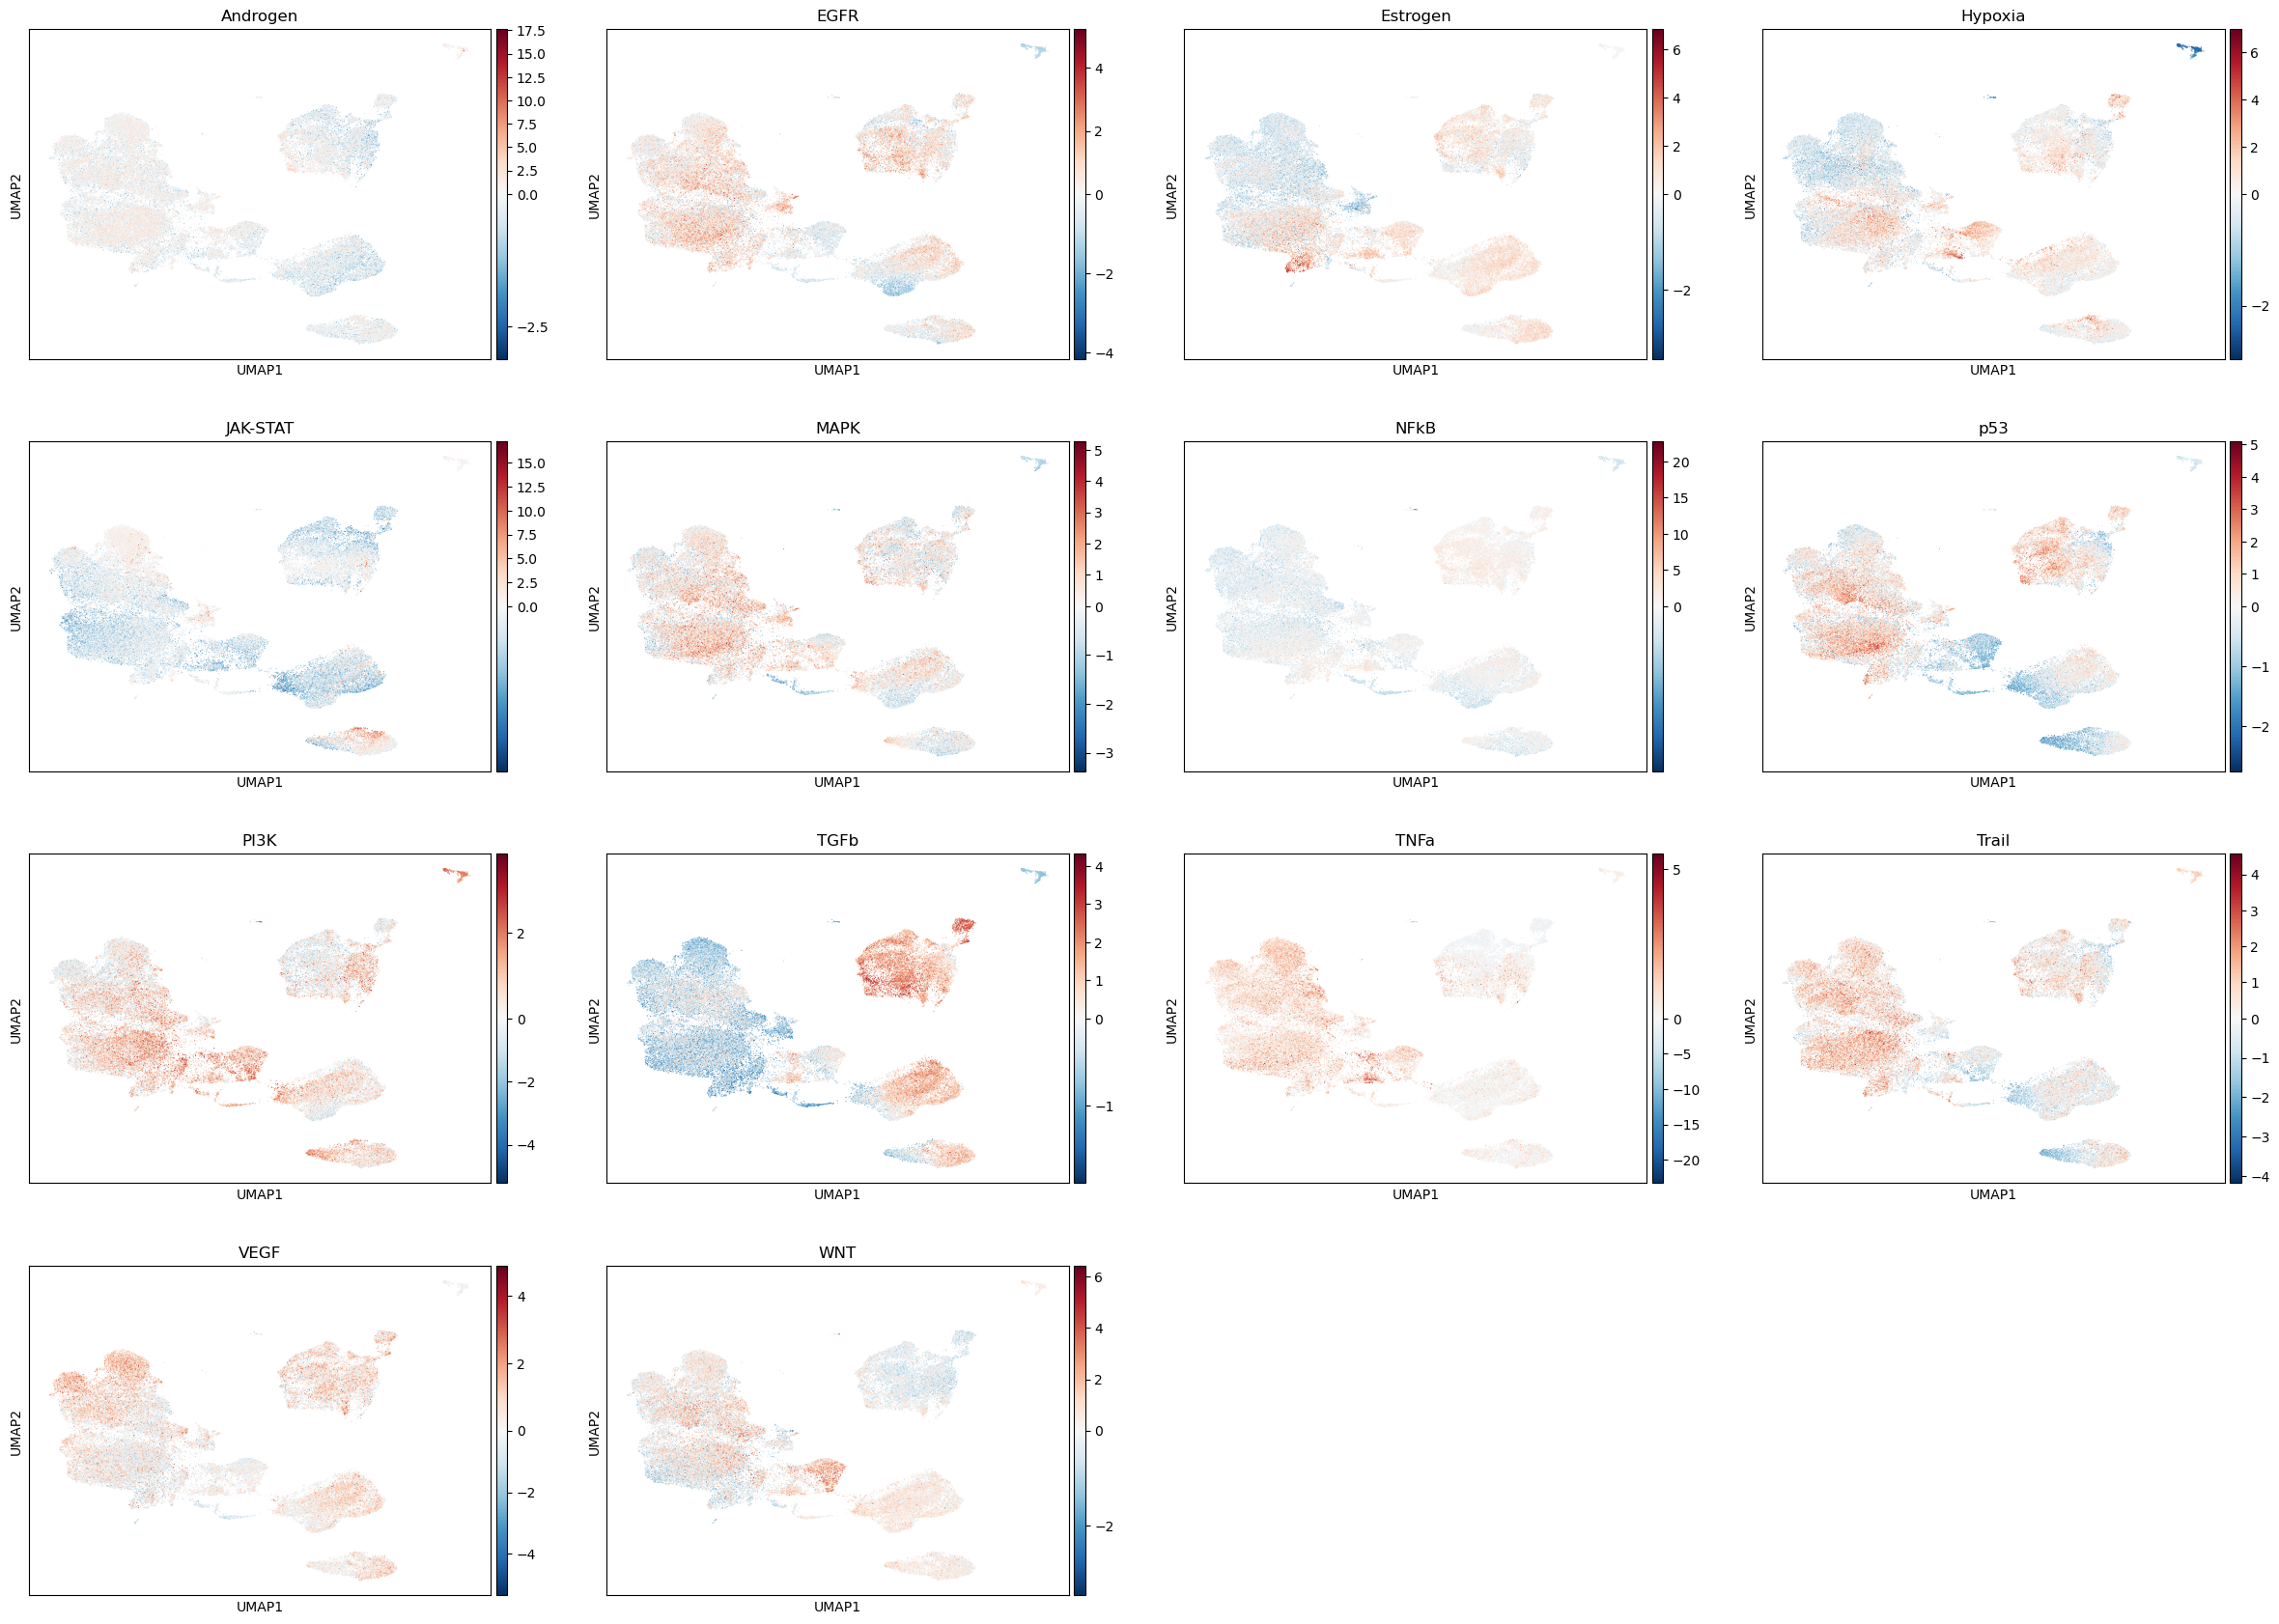

In [51]:
sc.pl.umap(acts, 
           color=['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT'], 
           cmap='RdBu_r', 
           vcenter=0,
           save='pathway_umap.pdf')

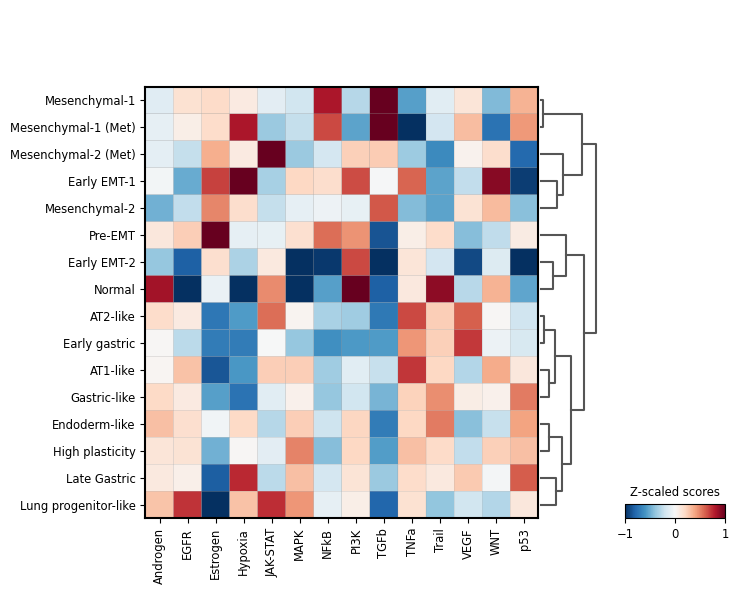

In [56]:
sc.pl.matrixplot(acts, 
                 var_names=acts.var_names, 
                 groupby='Cluster-Name', 
                 dendrogram=True,
                 colorbar_title='Z-scaled scores', 
                 vmin=-1, 
                 vmax=1, 
                 cmap='RdBu_r',
                 save='pathway.pdf')